# Evaluate Neural Network

In [53]:
# Classification template
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# Importing the dataset
dataset = pd.read_csv('4_Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values   # upperbound is not included
y = dataset.iloc[:, 13].values    # class
df_X = pd.DataFrame(X)

#### Before split dataset in training set and test set we have to transform the categorical data in numerical data 

In [55]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

## Create the dummy variables
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

## is not necessary to do the same for Male and Female because is a binary value
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
# Feature scaling is a method used to normalize the range of independent variables or features of data. 
# In data processing, it is also known as data normalization and is generally performed during 
# the data preprocessing step.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Now our data are well preprocessed!  Let's import keras libraries 

In [56]:
import keras # using tendorflow backend
from keras.models import Sequential
from keras.layers import Dense

let's build a classifier. Our ANN is a Sequential of layers 
The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. 

In [57]:
classifier = Sequential()

# We need 12 input nodes 

# We use a Rectifier activation function for the hidden layer 

# We use a Sigmoid activation function for the putput layer so we will be able to see which customer 
# has higher probability to leave the bank 


In [58]:
# adding the first hidden layer 
classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 12 ))

# adding the second hidden layer 
classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu'))

# adding the output layer 
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')) # sigmoid 

# KEEP IN MIND : for more than 2 categories you'll use SOFTMAX function
# compile the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Fitting the ANN with the training set 
h = classifier.fit(X_train, y_train, batch_size =80  , nb_epoch = 100) 

y_pred  = classifier.predict(X_test)

/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=7, kernel_initializer="uniform")`
  
/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  """
/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/100
8000/8000 [==============================] - 0s 22us/step - loss: 0.6633 - accuracy: 0.7934
Epoch 2/100
8000/8000 [==============================] - 0s 9us/step - loss: 0.5050 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4424 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4354 - accuracy: 0.7960
Epoch 5/100
8000/8000 [==============================] - 0s 9us/step - loss: 0.4319 - accuracy: 0.7960
Epoch 6/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4298 - accuracy: 0.7960
Epoch 7/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4279 - accuracy: 0.7960
Epoch 8/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4264 - accuracy: 0.7960
Epoch 9/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4253 - accuracy: 0.7960
Epoch 10/100
8000/8000 [==============================] - 0s 8us/step - 

8000/8000 [==============================] - 0s 9us/step - loss: 0.4003 - accuracy: 0.8355
Epoch 80/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4004 - accuracy: 0.8367
Epoch 81/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4002 - accuracy: 0.8363
Epoch 82/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4003 - accuracy: 0.8370
Epoch 83/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4002 - accuracy: 0.8374
Epoch 84/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4001 - accuracy: 0.8355
Epoch 85/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.4001 - accuracy: 0.8356
Epoch 86/100
8000/8000 [==============================] - 0s 9us/step - loss: 0.4000 - accuracy: 0.8365
Epoch 87/100
8000/8000 [==============================] - 0s 9us/step - loss: 0.4000 - accuracy: 0.8364
Epoch 88/100
8000/8000 [==============================] - 0s 8us/step - loss:

# Confusion matrix 

In [59]:
y_pred_bool = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)
cm

array([[1543,   52],
       [ 268,  137]])

# Accuracy 

In [60]:
(1517 + 201) / 2000    

0.859

## WHAT IS THE ACCURACY OF THE MODEL? 
giudicare il nostro modello da una sola ccuracy non è il modo migliore per valutare il nostro modello 
# K-FOLD VALIDATION 
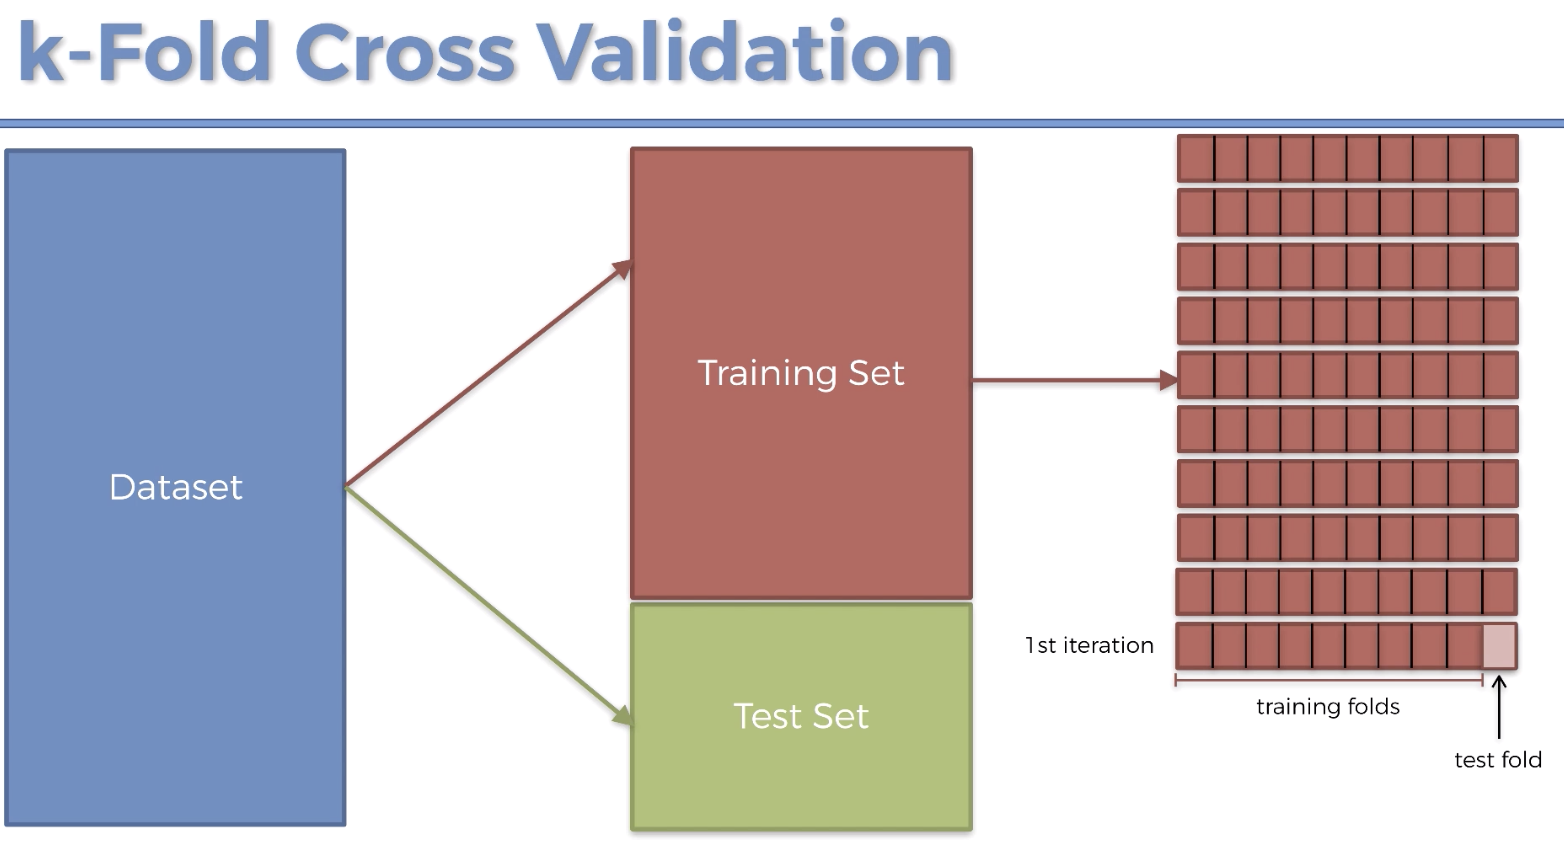

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import cross_val_score

In [62]:
def build_classifier(): 
# we can build it  
    classifier = Sequential()
    classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 12 ))
    classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')) # sigmoid 
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )
    return classifier

#NOPE 
# h = classifier.fit(X_train, y_train, batch_size =80  , nb_epoch = 100) 


In [63]:
clasf = KerasClassifier(build_fn = build_classifier, batch_size =80  , nb_epoch = 100)
accuracies = cross_val_score(estimator = clasf, X = X_train, y = y_train, cv = 10, n_jobs = -1  )
# n_jobs = -1 use all the CPU to do parallel computation 


In [64]:
accuracies # this is the relevant result 

array([0.78625   , 0.79000002, 0.80000001, 0.78250003, 0.81625003,
       0.81      , 0.78750002, 0.79374999, 0.79874998, 0.79500002])

In [65]:
# let's compute the mean of the accuracies 
mean = accuracies.mean()
mean

0.7960000097751617

In [66]:
variance = accuracies.std()
variance 

0.010105690527913859

# OVERFITTING ? 
when you have a really high accuracy.
also when you have a high variance in cross validation.

## Dropout regularization 
At each iteration of the training, some neurons of your ANN will randomly disabled to prevent them to be dependent to each other when they learn the correlations.  

That prevent the neurons to learn to much and so prevent the overfitting.

You can apply dropout to the layers, you can choose which layer. 
It is better to apply dropout to all the layers. 


Dropout(
- p = float between 0 and 1. Fraction of the input unit (neurons) to drop. Start p = 0.1 and then increase p if you still have the overfitting problem.


)

In [67]:
from keras.layers import Dropout

In [68]:
def build_classifier_dropout(): 
# we can build it  
    classifier = Sequential()
    classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 12 ))
    classifier.add(Dropout( p = 0.1 ) )
    
    classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu'))
    classifier.add(Dropout( p = 0.1 ) )
    
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')) # sigmoid 
    classifier.add(Dropout( p = 0.1 ) )
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )
    return classifier

In [69]:
clasf = KerasClassifier(build_fn = build_classifier_dropout, batch_size =80  , nb_epoch = 100)
accuracies = cross_val_score(estimator = clasf, X = X_train, y = y_train, cv = 10, n_jobs = -1  )
# n_jobs = -1 use all the CPU to do parallel computation 
mean = accuracies.mean()
mean

0.7960000097751617

In [70]:
variance = accuracies.std()
variance 

0.010105690527913859

## GridSearchCV

GridSearchCV lets you combine an estimator with a grid search preamble to tune hyper-parameters. The method picks the optimal parameter from the grid search and uses it with the estimator selected by the user. GridSearchCV inherits the methods from the classifier, so yes, you can use the .score, .predict, etc.. methods directly through the GridSearchCV interface. If you wish to extract the best hyper-parameters identified by the grid search you can use .best_params_ and this will return the best hyper-parameter. You can then pass this hyper-parameter to your estimator separately.

Using .predict directly will yield the same results as getting the best hyper-parameter through .best_param_ and then using it in your model. By understanding the underlining workings of grid search we can see why this is the case.

In [86]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense 


def build_classifier_search(optimizer): 
# we can build it  
    classifier = Sequential()
    classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 12 ))
    classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')) # sigmoid 
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy' , metrics = ['accuracy'] )
    return classifier

clasf = KerasClassifier(build_fn = build_classifier_search)


In [91]:
# Let's create the dictionary whit all the hyperparameters variable
# keys and the hyperparameters we want to test 

parameters = {'batch_size': [25, 32, 100, 80],
             'nb_epoch' : [100, 500], 
             'optimizer' : ['adam', 'rmsprop'] }

grid_search = GridSearchCV(estimator = clasf, param_grid = parameters, scoring = 'accuracy', cv = 10 )

In [92]:
grid_search = grid_search.fit(X_train, y_train)

/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=7, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/Users/Paola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':


Epoch 1/1
7200/7200 [==============================] - 0s 40us/step - loss: 0.5473 - accuracy: 0.7961
Epoch 1/1
7200/7200 [==============================] - 0s 41us/step - loss: 0.5479 - accuracy: 0.7965
Epoch 1/1
7200/7200 [==============================] - 0s 40us/step - loss: 0.5862 - accuracy: 0.7936
Epoch 1/1
7200/7200 [==============================] - 0s 40us/step - loss: 0.5745 - accuracy: 0.7965
Epoch 1/1
7200/7200 [==============================] - 0s 41us/step - loss: 0.5420 - accuracy: 0.7936
Epoch 1/1
7200/7200 [==============================] - 0s 44us/step - loss: 0.5430 - accuracy: 0.7943
Epoch 1/1
7200/7200 [==============================] - 0s 46us/step - loss: 0.5443 - accuracy: 0.7964
Epoch 1/1
7200/7200 [==============================] - 0s 44us/step - loss: 0.6001 - accuracy: 0.7958
Epoch 1/1
7200/7200 [==============================] - 0s 43us/step - loss: 0.5549 - accuracy: 0.7947
Epoch 1/1
7200/7200 [==============================] - 0s 43us/step - loss: 0.5357

7200/7200 [==============================] - 0s 22us/step - loss: 0.6719 - accuracy: 0.7953
Epoch 1/1
7200/7200 [==============================] - 0s 22us/step - loss: 0.6793 - accuracy: 0.7882
Epoch 1/1
7200/7200 [==============================] - 0s 22us/step - loss: 0.6703 - accuracy: 0.7956
Epoch 1/1
7200/7200 [==============================] - 0s 21us/step - loss: 0.6811 - accuracy: 0.7890
Epoch 1/1
7200/7200 [==============================] - 0s 22us/step - loss: 0.6792 - accuracy: 0.7890
Epoch 1/1
7200/7200 [==============================] - 0s 21us/step - loss: 0.6763 - accuracy: 0.7936
Epoch 1/1
7200/7200 [==============================] - 0s 22us/step - loss: 0.6766 - accuracy: 0.7904
Epoch 1/1
7200/7200 [==============================] - 0s 21us/step - loss: 0.6754 - accuracy: 0.7925
Epoch 1/1
7200/7200 [==============================] - 0s 22us/step - loss: 0.6730 - accuracy: 0.7947
Epoch 1/1
7200/7200 [==============================] - 0s 22us/step - loss: 0.6764 - accurac

8000/8000 [==============================] - 0s 39us/step - loss: 0.5721 - accuracy: 0.7941


In [93]:
best_parameters = grid_search.best_params_
best_parameters

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}

In [94]:
best_accuracy = grid_search.best_score_
best_accuracy

0.796